In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [22]:
from astropy.cosmology import Planck15 as cosmo

In [3]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.10001, 1.1, 0.1))

In [4]:
# ten years
zdist.DeltaT

10.0

In [5]:
# The sky is >~ 40000 sq degrees ~ 4000 * LSST field of view
zdist.skyFraction * 2000 * 2

0.93084226773030898

In [6]:
zdist.zSampleSize().sum()

20056.477725164284

In [7]:
# To compare wih David's rate divide by number of days (note bins go from 0.1 to 1.0 in steps of 0.1)
zdist.zSampleSize() / 3650.

array([ 0.04020827,  0.11173081,  0.21920991,  0.35977226,  0.52934363,
        0.72334247,  0.93717421,  1.16654051,  1.40760333])

In [11]:
# Get samples of those numbers and histogram (consistency, should not be new information) 
np.histogram(zdist.zSamples, np.arange(0.1, 1.01, 0.1))[0]/3650.

array([ 0.03945205,  0.10493151,  0.21123288,  0.35671233,  0.52657534,
        0.71013699,  0.93342466,  1.14438356,  1.39643836])

In [14]:
otherEstimate = np.array([0.0297949656, 0.0773033283291, 0.143372148164, 0.224245838014, 0.315868414203, 0.413859866222
, 0.513435128451, 0.609346340913, 0.696255385228])


In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

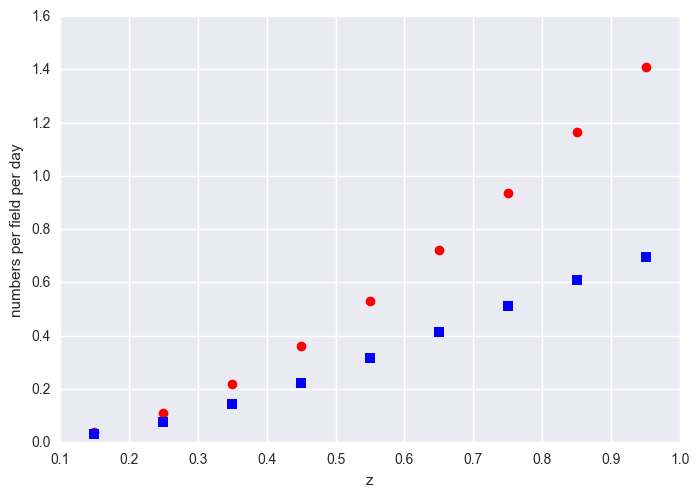

In [16]:
fig, ax = plt.subplots()
zvals = np.arange(0.15, 0.96, 0.1)
ax.plot(zvals, zdist.zSampleSize()/ 3650., 'or')
ax.plot(zvals, otherEstimate, 'bs')
ax.set_xlabel('z')
ax.set_ylabel('numbers per field per day')

## Parts of the calculation

In [31]:
zbin_edges = np.arange(0.1, 1.01, 0.1)
diff_volume = cosmo.comoving_volume(zbin_edges[1:]) - cosmo.comoving_volume(zbin_edges[:-1])
print diff_volume

[  2.17006770e+09   5.32151113e+09   9.30243830e+09   1.37157266e+10
   1.82594260e+10   2.27178757e+10   2.69472784e+10   3.08599635e+10
   3.44098469e+10] Mpc3


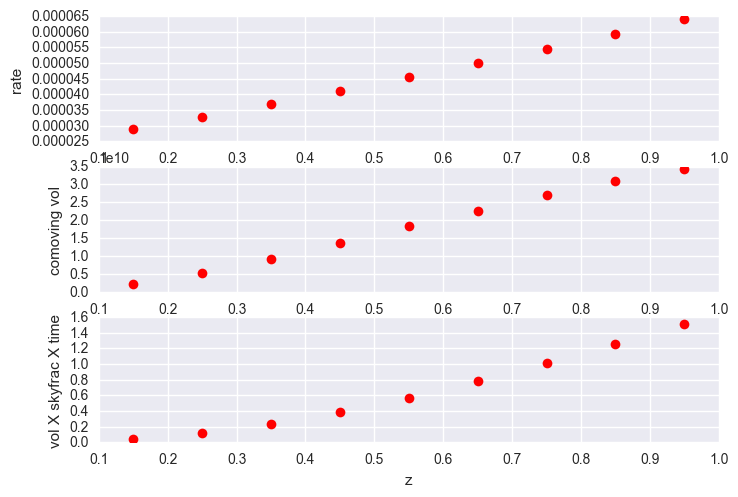

In [32]:
fig_subs, axs = plt.subplots(3)
axs[0].plot(zvals, zdist.snRate(zvals), 'or')
axs[1].plot(zvals, diff_volume , 'or')
axs[2].plot(zvals, diff_volume * zdist.snRate(zvals)*10.0/40000. / 365.0, 'or')
axs[2].set_xlabel('z')
axs[0].set_ylabel('rate')
axs[1].set_ylabel('comoving vol')
axs[2].set_ylabel('vol X skyfrac X time')